## Import Libraries

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np 

## Import Dataset

In [2]:
data1 = pd.read_csv('unemploment_data/Unemployment in India.csv')
data2 = pd.read_csv('unemploment_data/Unemployment_Rate_upto_11_2020.csv')

In [3]:
data1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
data2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


## Data Preprocessing

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
data1.columns, data2.columns    # Column names are with extra spaces, lets remove them

(Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
        ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
        'Area'],
       dtype='object'),
 Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
        ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
        'Region.1', 'longitude', 'latitude'],
       dtype='object'))

#### Fixing column names and column types

In [8]:
new_col_names_data1 = []
for col in data1.columns:
    new_col_names_data1.append(col.strip().lower().replace(" ", "_"))

new_col_names_data2 = []
for col in data2.columns:
    new_col_names_data2.append(col.strip().lower().replace(" ", "_"))

data1.columns = new_col_names_data1
data2.columns = new_col_names_data2

data1.columns, data2.columns

(Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
        'estimated_employed', 'estimated_labour_participation_rate_(%)',
        'area'],
       dtype='object'),
 Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
        'estimated_employed', 'estimated_labour_participation_rate_(%)',
        'region.1', 'longitude', 'latitude'],
       dtype='object'))

In [9]:
data1["region"] = data1["region"].astype('category')
data2["region"] = data2["region"].astype('category')

data1["frequency"] = data1["frequency"].astype('category')
data2["frequency"] = data2["frequency"].astype('category')

data1["date"] = data1["date"].apply(str).apply(pd.Timestamp)
data2["date"] = data2["date"].apply(str).apply(pd.Timestamp)

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   region                                   740 non-null    category      
 1   date                                     740 non-null    datetime64[ns]
 2   frequency                                740 non-null    category      
 3   estimated_unemployment_rate_(%)          740 non-null    float64       
 4   estimated_employed                       740 non-null    float64       
 5   estimated_labour_participation_rate_(%)  740 non-null    float64       
 6   area                                     740 non-null    object        
dtypes: category(2), datetime64[ns](1), float64(3), object(1)
memory usage: 33.0+ KB


In [11]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   region                                   267 non-null    category      
 1   date                                     267 non-null    datetime64[ns]
 2   frequency                                267 non-null    category      
 3   estimated_unemployment_rate_(%)          267 non-null    float64       
 4   estimated_employed                       267 non-null    int64         
 5   estimated_labour_participation_rate_(%)  267 non-null    float64       
 6   region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(4

#### Handling missing values

In [12]:
data1.isnull().sum()

region                                     28
date                                       28
frequency                                  28
estimated_unemployment_rate_(%)            28
estimated_employed                         28
estimated_labour_participation_rate_(%)    28
area                                       28
dtype: int64

- There are `28` rows, where all the values are null, they must be removed

In [13]:
data1.dropna(how = 'all', inplace = True)
data1.isnull().sum()

region                                     0
date                                       0
frequency                                  0
estimated_unemployment_rate_(%)            0
estimated_employed                         0
estimated_labour_participation_rate_(%)    0
area                                       0
dtype: int64

In [14]:
data1["estimated_employed"] = data1["estimated_employed"].astype("int32")

### Merging two dataframes

In [15]:
merged_data = pd.concat([data1, data2]).drop(columns = ["latitude", "longitude"])

In [16]:
merged_data.head()

,region,date,frequency,estimated_unemployment_rate_(%),estimated_employed,estimated_labour_participation_rate_(%),area,region.1
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural,NaN
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural,NaN
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural,NaN
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural,NaN
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural,NaN


## Exploratory Data Analysis (EDA)

In [17]:
merged_data["region"].value_counts().reset_index().style.background_gradient(cmap = 'gnuplot')

,region,count
0,Andhra Pradesh,38
1,Kerala,38
2,West Bengal,38
3,Uttar Pradesh,38
4,Tripura,38
5,Telangana,38
6,Tamil Nadu,38
7,Rajasthan,38
8,Punjab,38
9,Odisha,38


- Less data available for `Sikkim` and `Chandigarh`

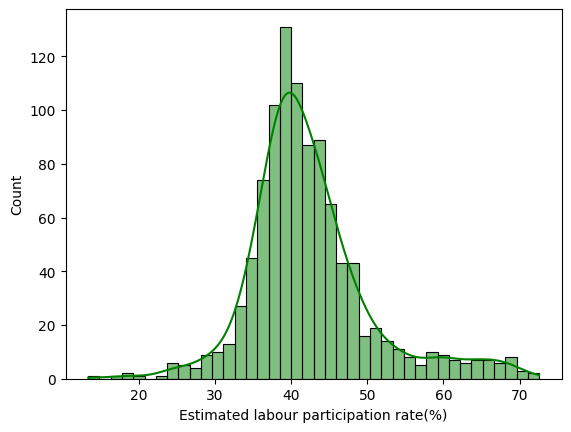

In [18]:
sns.histplot(x = "estimated_labour_participation_rate_(%)", data = merged_data, kde = True, color = "green")
plt.xlabel("Estimated labour participation rate(%)");

- `30%` to `50%` people participates to any work

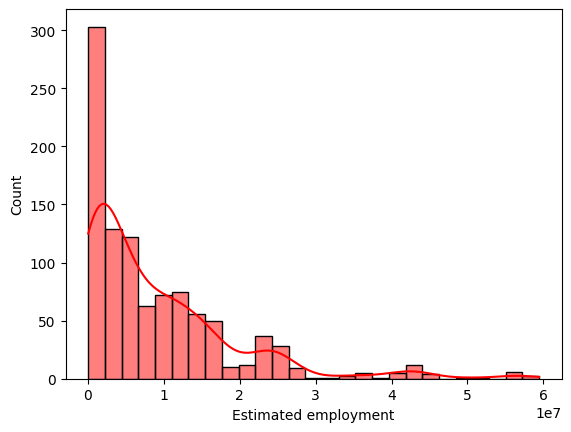

In [19]:
sns.histplot(x = "estimated_employed", data = merged_data, kde = True, color = "red")
plt.xlabel("Estimated employment");

- Mainly ~`50,000` to ~`30,000,000` employed to any work over the time

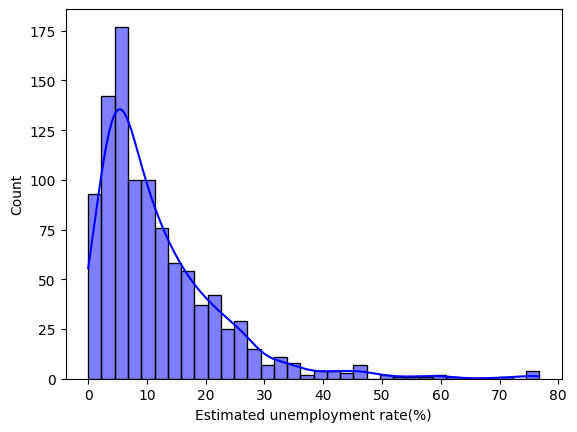

In [20]:
sns.histplot(x = "estimated_unemployment_rate_(%)", data = merged_data, kde = True, color = "blue")
plt.xlabel("Estimated unemployment rate(%)");

- Around `30%` people unemployed over the time

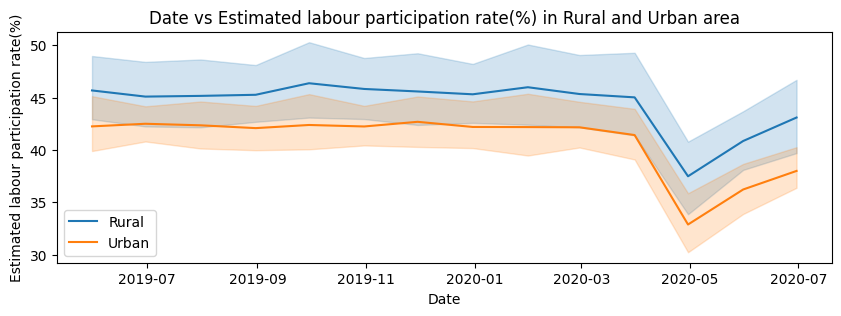

In [21]:
plt.figure(figsize = (10, 3))
sns.lineplot(x = "date", y = "estimated_labour_participation_rate_(%)", data = merged_data, hue = 'area')
plt.xlabel("Date")
plt.legend(loc = "lower left")
plt.ylabel("Estimated labour participation rate(%)")
plt.title("Date vs Estimated labour participation rate(%) in Rural and Urban area");

- The labour participation rate(%) is more from **rural** area and it **decreased** over `April 2020` to `May 2020` then **increased** in both **rural** and **urban** side

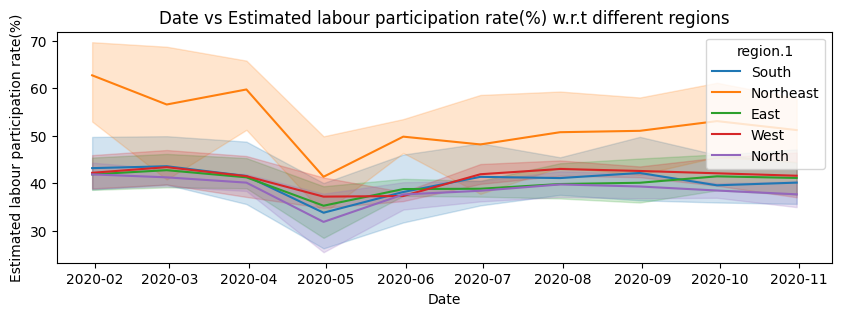

In [22]:
plt.figure(figsize = (10, 3))
sns.lineplot(x = "date", y = "estimated_labour_participation_rate_(%)", data = merged_data, hue = 'region.1')
plt.xlabel("Date")
plt.ylabel("Estimated labour participation rate(%)")
plt.title("Date vs Estimated labour participation rate(%) w.r.t different regions");

- Most of the labours participate from the **North East** side

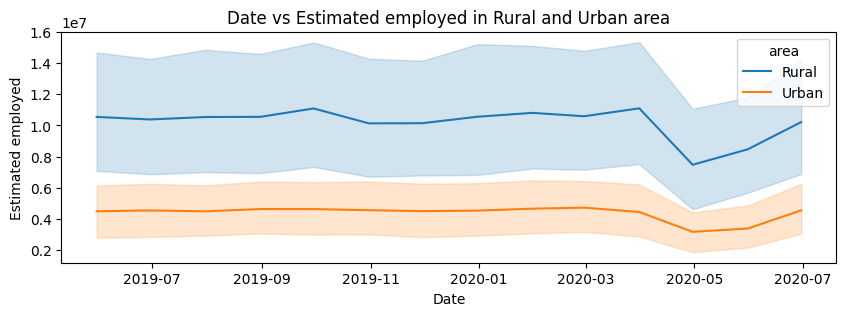

In [23]:
plt.figure(figsize = (10, 3))
sns.lineplot(x = "date", y = "estimated_employed", data = merged_data, hue = "area")
plt.xlabel("Date")
plt.ylabel("Estimated employed")
plt.title("Date vs Estimated employed in Rural and Urban area");

- The estimated employment of the labours is more from the **rural** side than **urban** side and it seems to **decrease** in `January 2020` and `May 2020` then **increases** for both parties

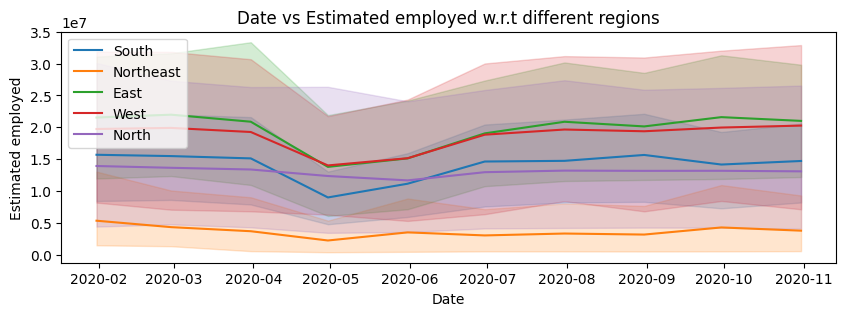

In [24]:
plt.figure(figsize = (10, 3))
sns.lineplot(x = "date", y = "estimated_employed", data = merged_data, hue = "region.1")
plt.xlabel("Date")
plt.ylabel("Estimated employed")
plt.legend(loc = 'upper left')
plt.title("Date vs Estimated employed w.r.t different regions");

- It seems to be most of the labours are employed from the **East** side and it is lowest from the **North East** side

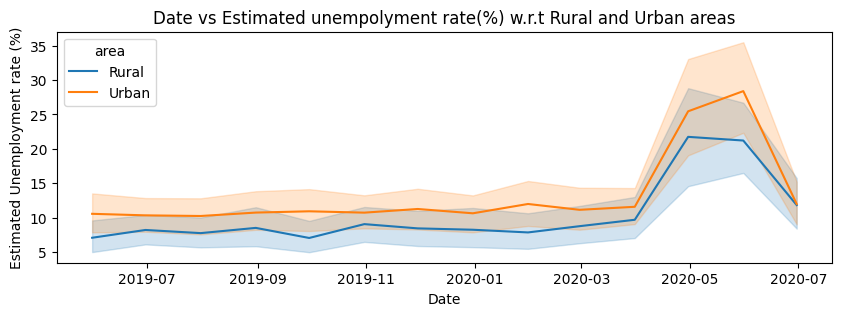

In [25]:
plt.figure(figsize = (10, 3))
sns.lineplot(x = "date", y = "estimated_unemployment_rate_(%)", data = merged_data, hue = 'area')
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment rate (%)")
plt.title("Date vs Estimated unempolyment rate(%) w.r.t Rural and Urban areas");

- The estimated unemployment rate(%) of the labours is more from the **Urban** side and it **increased** over `March 2020` to `June 2020`, then it starts to decrease for both the parties

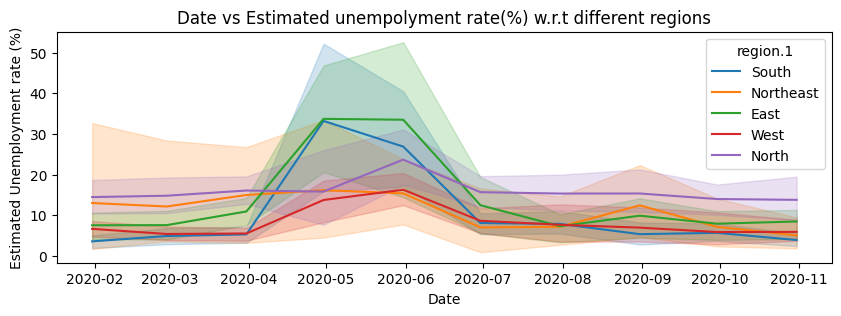

In [26]:
plt.figure(figsize = (10, 3))
sns.lineplot(x = "date", y = "estimated_unemployment_rate_(%)", data = merged_data, hue = 'region.1')
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment rate (%)")
plt.title("Date vs Estimated unempolyment rate(%) w.r.t different regions");

- The unemployment rate is more from the **South** and **East** side than other regions

## Analysis by the states

In [27]:
state_grouped_df = merged_data.groupby("region")

### Estimated labour participation rate(%) of all states

In [28]:
state_grouped_df["estimated_labour_participation_rate_(%)"].agg(["mean", "max"]).sort_values("mean", ascending = False).style.background_gradient(cmap = "hot")

,mean,max
region,,
Tripura,60.777632,72.260000
Meghalaya,57.831622,69.660000
Telangana,53.520789,72.570000
Sikkim,45.969600,60.590000
Gujarat,45.940263,54.550000
West Bengal,45.349211,50.360000
Assam,44.487778,57.390000
Himachal Pradesh,43.177368,52.550000
Haryana,42.569474,49.850000


- `Tripura`, `Meghalaya` and `Telengana` are the top **3** states from where most of the labours participate

### Total number of labours employed (estimated) from all states

In [29]:
state_grouped_df["estimated_employed"].agg(["mean", "max"]).sort_values("mean", ascending = False).style.background_gradient(cmap = "hot")

,mean,max
region,,
Uttar Pradesh,35313244.500000,59433759
Maharashtra,25046659.631579,43317881
West Bengal,21437123.868421,36964178
Bihar,15324252.000000,26902907
Tamil Nadu,14827007.631579,27570589
Gujarat,14383258.394737,25970259
Madhya Pradesh,14063603.000000,23940158
Karnataka,13550513.578947,24215057
Rajasthan,12591245.657895,20641716


- `Uttar Pradesh`, `Maharashtra` and `West Bengal` are the top **3** states from where most of the labours got employed

### Estimated unemployment rate(%) of all the states

In [30]:
state_grouped_df["estimated_unemployment_rate_(%)"].agg(["mean", "max"]).sort_values("mean", ascending = False).style.background_gradient(cmap = "hot")

,mean,max
region,,
Tripura,27.483158,43.640000
Haryana,26.597368,46.890000
Jharkhand,20.309737,70.170000
Bihar,19.063684,58.770000
Himachal Pradesh,17.888947,50.000000
Delhi,17.000263,45.780000
Jammu & Kashmir,16.275333,24.060000
Chandigarh,15.991667,22.050000
Rajasthan,14.534474,35.530000


- On average, `Tripura`, `Haryana` and `Jharkhand` are the top **3** states where the unemployment rate(%) is maximum

In [31]:
state_grouped_df["estimated_unemployment_rate_(%)"].agg(["mean", "max"]).sort_values("max", ascending = False).style.background_gradient(cmap = "hot")

,mean,max
region,,
Puducherry,12.361389,76.740000
Jharkhand,20.309737,70.170000
Bihar,19.063684,58.770000
Tamil Nadu,10.048158,53.190000
Himachal Pradesh,17.888947,50.000000
Haryana,26.597368,46.890000
Delhi,17.000263,45.780000
Tripura,27.483158,43.640000
Punjab,12.017895,40.590000


- `Puducherry`, `Jharkhand`, `Bihar`, `Tamil Nadu` and `Himachal Pradesh` are the top **5** states, where the unemployment rate(%) reached very high over the times

### Putting everything together

In [32]:
state_grouped_df.agg({
    "estimated_labour_participation_rate_(%)": ["mean", "max"],
    "estimated_employed": ["mean", "max"],
    "estimated_unemployment_rate_(%)" : ["mean", "max"],
}).style.background_gradient(cmap = "inferno")

##  **Conclusion:** 
It is very clear from the plots that - 
- The **estimated unemployment rate(%)** `increased` during the *Covid-19* period.
- The **estimated labour participation rate(%)** `decreased` during the *Covid-19* period.
- The **estimated labour employment** `decreased` during the Covid-19 *period*.